In [1]:
import numpy as np
import pandas as pd
import networkx as nx

%matplotlib inline

In [2]:
import airtable as at
import json

In [3]:
with open('api.json') as json_file:
    ak = json.load(json_file)


In [4]:
api_key = ak['key']
base_key = "appx3e9Przn9iprkU"
organizations_table = "Organizations"
projects_table = "Projects"

In [5]:
orgs = at.Airtable(base_key, organizations_table, api_key)
daos = orgs.get_all(view='DAOs in the Wild',sort='Organization name')

projs = at.Airtable(base_key, projects_table, api_key)
tools = projs.get_all(view = 'OSS Governance', sort='Project name')

In [6]:
daos[0]

{'id': 'recR4Tf4XWOc6RII4',
 'fields': {'Organization name': '/r/ethtrader',
  'Website': 'https://reddit.com/r/ethtrader',
  'Activities': ['social'],
  'Description': 'Community rewards and reputation that can be used for in-game governance, items, and trading.',
  'Uses project (staging for Instances)': ['recTLikaQcam7XT6J'],
  'Structure (observed)': ['recRfWaeaqKyR7Rju'],
  'Process to join': ['buy', 'earn'],
  'Process to leave': "you don't",
  'Effort to join': 'easy',
  'Can you join?': 'public',
  'Meets regularly?': ['async chats'],
  'Instances': ['recFIpeT8VpxW7GwL'],
  'Instance URL (lookup)': ['https://mainnet.aragon.org/#/0x57EBE61f5f8303AD944136b293C1836B3803b4c0']},
 'createdTime': '2020-08-11T21:08:14.000Z'}

In [7]:
tools[0]

{'id': 'recpnVuaGssc3G05f',
 'fields': {'Project name': '1Hive Gardens',
  'Category': 'product',
  'Website': 'https://github.com/1Hive/gardens-template',
  'Legally owned by organization': ['recxhL8QqbWOKzwu8'],
  'Online / offline': 'Online communities',
  'Code repository': 'https://github.com/1Hive/gardens-template',
  'Uses project': ['recTLikaQcam7XT6J'],
  'Status': 'Active',
  'Project ownership type': 'Open-source license',
  'Year founded / first commit': 2020,
  'Tags': ['DAO ecosystem', 'blockchain ecosystem']},
 'createdTime': '2020-07-01T15:48:35.000Z'}

## New material above
 Established live link to govbase airtable, specifically accessing the view "DAOs in the Wild" in the "Organizations" table.

    Update: added access to the "Projects" table via the "OSS Governance" view.  



 ## Next steps
 Next steps are to write new formatters for the govbased sourced data
 - conform and join data from Projects and Orgs to fit the usecase in the prototype 
 - networkx objects for network analysis, especially plotting, and structural exploratory data analysis.
 - also looking at algebraic repsentations for (scalable) analytic methods based on algebraic graph theory, and algebraic topology

In [8]:
fields = ["Uses project (staging for Instances)", "Organization name"]
data = orgs.get_all(view='DAOs in the Wild',sort='Organization name', fields=fields)

In [9]:
data[0]['fields']['Uses project (staging for Instances)']

['recTLikaQcam7XT6J']

In [10]:
for d in data[:3]:
    print(d)
    print(d['fields']['Uses project (staging for Instances)'])
    print(len(d['fields']['Uses project (staging for Instances)']))
    print('')

{'id': 'recR4Tf4XWOc6RII4', 'fields': {'Organization name': '/r/ethtrader', 'Uses project (staging for Instances)': ['recTLikaQcam7XT6J']}, 'createdTime': '2020-08-11T21:08:14.000Z'}
['recTLikaQcam7XT6J']
1

{'id': 'recxhL8QqbWOKzwu8', 'fields': {'Organization name': '1Hive', 'Uses project (staging for Instances)': ['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR']}, 'createdTime': '2020-08-11T21:08:14.000Z'}
['recTLikaQcam7XT6J', 'rec2aM39btP3k6DRC', 'recijAqJh9rxY9MvH', 'rec8rCOyDwcwrT95S', 'recRJTkqk5uAagiMR', 'recHncqDiLal7GAPm', 'reca46I0TM3JSABJx', 'rec30pawOK8rt6ZjR']
8

{'id': 'reccEp6IXzucOpy3A', 'fields': {'Organization name': '1UP World', 'Uses project (staging for Instances)': ['rectOPIzuwyF7zqtE', 'rectjqMULWohD6jFn', 'recYxW89TiCDVKazv', 'rec30pawOK8rt6ZjR']}, 'createdTime': '2020-08-11T21:08:14.000Z'}
['rectOPIzuwyF7zqtE', 'rectjqMULWohD6jFn', 'recYxW89Ti

## Old material below 

 Transformations from prototype format to networkx format. 

In [3]:
data = tools.get_all_values()
headers = data.pop(0)
types = data.pop(0)

df = pd.DataFrame(data, columns=headers)

In [4]:
df[df.include=='TRUE']

,id,name,include,owner,dependencies,users,contributors
0,0,cadCAD,TRUE,[0],"[14, 17]","[0, 1, 2, 3, 4, 6, 7, 8]","[0, 4, 7, 8]"
1,1,Discord,TRUE,,,"[0, 1, 2, 8]",
2,2,Discourse,TRUE,,,"[0, 1, 2, 3, 5]",
3,3,Aragon Platform,TRUE,[5],,"[1, 3, 5, 6, 7, 8]",
4,4,1Hive Gardens,TRUE,[3],,[3],
7,7,Conviction Voting,TRUE,,[3],"[3, 4, 7]","[4, 6, 7]"
8,8,SourceCred,TRUE,[2],"[9, 1, 2]","[0, 1, 2, 4, 8]",
9,9,GitHub,TRUE,,,"[0, 1, 2, 3, 4, 5, 6, 7]",
14,14,numpy (tool),TRUE,,[17],"[0,4]","[13, 14]"
16,17,python,TRUE,,,"[0,4]",[14]


In [5]:
o_data = orgs.get_all_values()
o_headers = o_data.pop(0)
o_types = o_data.pop(0)

odf = pd.DataFrame(o_data, columns=o_headers)

In [6]:
odf[odf.include=='TRUE']

,id,name,include,scale (approx members),tools used
0,0,cadCAD (org),TRUE,,
1,1,Metagame,TRUE,,
2,2,SourceCred (org),TRUE,,
3,3,1Hive,TRUE,,
4,4,BlockScience,TRUE,,
6,6,Aragon Association,TRUE,,
7,7,Commons Stack,TRUE,,
8,8,TokenEngineering Community,TRUE,,
13,13,numpy (org),TRUE,,
14,14,numfocus (org),TRUE,,


In [7]:
od = odf[odf.include=='TRUE'].values

In [8]:
od[0]

array(['0', 'cadCAD (org)', 'TRUE', '', ''], dtype=object)

In [9]:
G = nx.DiGraph()

In [10]:
def add_org(g, r):
    nids = [n for n in g.nodes]
    if nids == []:
        nid = 0
    else:
        nid = max(nids)+1
    g.add_node(nid)
    
    g.nodes[nid]['type']='org'
    g.nodes[nid]['oid'] = int(r[0])
    g.nodes[nid]['name'] = r[1]
    g.nodes[nid]['size'] = r[3]

In [11]:
def add_orgs(g, R):
    for r in R:
        add_org(g, r)

In [12]:
def get_nodes_by_type(g, node_type_selection):

    return [node for node in g.nodes if g.nodes[node]['type']== node_type_selection ]

In [13]:
def get_org_node_by_oid(g, oid):
    onids = get_nodes_by_type(g, 'org')
    go = True
    for nid in onids:
        if go:
            val = g.nodes[nid]['oid']
            if val == oid:
                go = False
                return val
    
    return None

In [14]:
add_orgs(G,od)

In [15]:
get_org_node_by_oid(G, 5)

In [16]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [17]:
def add_tool(g, r):
    nids = [n for n in g.nodes]
    if nids == []:
        nid = 0
    else:
        nid = max(nids)+1
    g.add_node(nid)
    
    g.nodes[nid]['type']='tool'
    g.nodes[nid]['tid'] = int(r[0])
    g.nodes[nid]['name'] = r[1]
    
    try:
        owner_id = int(r[3][0])
        g.nodes[nid]['owner'] = get_org_node_by_oid(G, owner_id)
    except:
        g.nodes[nid]['owner'] = None

In [18]:
td = df[df.include=='TRUE'].values

In [19]:
td[0]

array(['0', 'cadCAD', 'TRUE', '[0]', '[14, 17]',
       '[0, 1, 2, 3, 4, 6, 7, 8]', '[0, 4, 7, 8]'], dtype=object)

In [20]:
def add_tools(g, R):
    for r in R:
        add_tool(g, r)

In [21]:
add_tools(G,td)

In [22]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22))

In [23]:
def str2list(x):
    if len(x)>0:
        import ast
        l = ast.literal_eval(x)
        return l
    else:
        return []

In [24]:
def add_edges(g, R):
    #node ids for orgs
    o_nodes = get_nodes_by_type(g, 'org')
    
    #maps the nodes oid to their node id
    oids = { g.nodes[n]['oid']:n for n in o_nodes }
    
    t_nodes = get_nodes_by_type(g, 'tool')
    tids = { g.nodes[n]['tid']:n for n in t_nodes }

    for r in R:
        tid = int(r[0])
        tnid = tids[tid]
        #add user edges
        users = str2list(r[5])
        #user edges go from tool to org
        for u in users:
            try:
                unid = oids[u]
                g.add_edge(tnid,unid)
                g.edges[tnid,unid]['type'] = 'user'
            except:
                str(u)
        
        #contributor edges
        contributors = str2list(r[6])
        #contributor edges go from tools to orgs
        for c in contributors:
            try:
                cnid = oids[c]
                g.add_edge(cnid,tnid)
                g.edges[cnid,tnid]['type'] = 'contributor'
            except:
                str(c)
    
    
        #dependency edges
        dependencies = str2list(r[4])
        #dependency edges go from tools to tools
        for d in dependencies:
            try:
                dnid = tids[d]
                g.add_edge(tnid,dnid)
                g.edges[tnid,dnid]['type'] = 'dependencies'
            except:
                str(d)
            


In [25]:
add_edges(G, td)

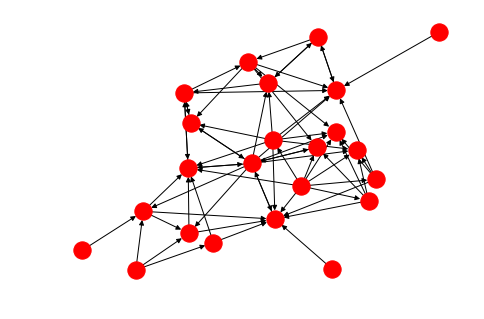

In [26]:
nx.draw_kamada_kawai(G)